### Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

Загрузка и первичный анализ данных

In [2]:
df = pd.read_csv('GM_players_statistics.csv')

In [3]:
df.shape

(1508, 35)

In [4]:
df.dtypes

ID                             int64
name                          object
username                      object
profile                       object
user_id                        int64
title                         object
fide                         float64
country                       object
followers                      int64
joined                        object
last_online                   object
current_rapid_rating         float64
highest_rapid_rating         float64
highest_rapid_date            object
rapid_win                    float64
rapid_draw                   float64
rapid_loss                   float64
current_blitz_rating         float64
highest_blitz_rating         float64
highest_blitz_date            object
blitz_win                    float64
blitz_draw                   float64
blitz_loss                   float64
current_bullet_rating        float64
highest_bullet_rating        float64
highest_bullet_date           object
bullet_win                   float64
b

In [5]:
df.isnull().sum()

ID                             0
name                         267
username                       0
profile                        0
user_id                        0
title                          0
fide                         595
country                        0
followers                      0
joined                         0
last_online                    0
current_rapid_rating         453
highest_rapid_rating         511
highest_rapid_date           511
rapid_win                    453
rapid_draw                   453
rapid_loss                   453
current_blitz_rating         120
highest_blitz_rating         126
highest_blitz_date           126
blitz_win                    120
blitz_draw                   120
blitz_loss                   120
current_bullet_rating        335
highest_bullet_rating        364
highest_bullet_date          364
bullet_win                   335
bullet_draw                  335
bullet_loss                  335
highest_tactics_rating         0
highest_ta

In [6]:
df.head()

,ID,name,username,profile,user_id,title,fide,country,followers,joined,...,highest_bullet_date,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_tactics_date,highest_puzzle_rush_score,is_streamer,status,league
0,0,Komodo Engine,komodochess,https://www.chess.com/member/KomodoChess,24944922,GM,3411.0,United States,494,07/11/2015,...,NaN,NaN,NaN,NaN,400,07/11/2015,NaN,False,premium,NaN
1,1,Vojtěch Plát,vojtechplat,https://www.chess.com/member/VojtechPlat,37712368,GM,2950.0,Czech Republic,360,11/08/2017,...,27/09/2021,32.0,8.0,47.0,3251,15/09/2021,49.0,False,premium,Bronze
2,2,PlayMagnus Carlsen,playmagnus,https://www.chess.com/member/PlayMagnus,19578862,GM,2882.0,Norway,199,05/11/2014,...,NaN,NaN,NaN,NaN,400,05/11/2014,NaN,False,premium,NaN
3,3,Magnus Carlsen,magnuscarlsen,https://www.chess.com/member/MagnusCarlsen,3889224,GM,2882.0,Norway,142482,27/08/2010,...,28/03/2023,662.0,98.0,246.0,400,27/08/2010,NaN,False,premium,Elite
4,4,Fabiano Caruana,fabianocaruana,https://www.chess.com/member/FabianoCaruana,11177810,GM,2835.0,United States,14445,17/03/2013,...,30/11/2021,713.0,65.0,203.0,3519,14/06/2023,64.0,False,premium,Crystal


In [7]:
total_count = df.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 1508


## Обработка пропусков в данных

##### Простые стратегии - удаление или заполнение нулями

In [8]:
df_new_1 = df.dropna(axis=1, how='any')
(df.shape, df_new_1.shape)

((1508, 35), (1508, 13))

In [9]:
df_new_2 = df.dropna(axis=0, how='any')
(df.shape, df_new_2.shape)

((1508, 35), (433, 35))

In [10]:
df_new_3 = df.fillna(0)
df_new_3.head()

,ID,name,username,profile,user_id,title,fide,country,followers,joined,...,highest_bullet_date,bullet_win,bullet_draw,bullet_loss,highest_tactics_rating,highest_tactics_date,highest_puzzle_rush_score,is_streamer,status,league
0,0,Komodo Engine,komodochess,https://www.chess.com/member/KomodoChess,24944922,GM,3411.0,United States,494,07/11/2015,...,0,0.0,0.0,0.0,400,07/11/2015,0.0,False,premium,0
1,1,Vojtěch Plát,vojtechplat,https://www.chess.com/member/VojtechPlat,37712368,GM,2950.0,Czech Republic,360,11/08/2017,...,27/09/2021,32.0,8.0,47.0,3251,15/09/2021,49.0,False,premium,Bronze
2,2,PlayMagnus Carlsen,playmagnus,https://www.chess.com/member/PlayMagnus,19578862,GM,2882.0,Norway,199,05/11/2014,...,0,0.0,0.0,0.0,400,05/11/2014,0.0,False,premium,0
3,3,Magnus Carlsen,magnuscarlsen,https://www.chess.com/member/MagnusCarlsen,3889224,GM,2882.0,Norway,142482,27/08/2010,...,28/03/2023,662.0,98.0,246.0,400,27/08/2010,0.0,False,premium,Elite
4,4,Fabiano Caruana,fabianocaruana,https://www.chess.com/member/FabianoCaruana,11177810,GM,2835.0,United States,14445,17/03/2013,...,30/11/2021,713.0,65.0,203.0,3519,14/06/2023,64.0,False,premium,Crystal


##### Imputation

In [11]:
# Выберем числовые колонки с пропущенными значениями
# Цикл по колонкам датасета
num_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка fide. Тип данных float64. Количество пустых значений 595, 39.46%.
Колонка current_rapid_rating. Тип данных float64. Количество пустых значений 453, 30.04%.
Колонка highest_rapid_rating. Тип данных float64. Количество пустых значений 511, 33.89%.
Колонка rapid_win. Тип данных float64. Количество пустых значений 453, 30.04%.
Колонка rapid_draw. Тип данных float64. Количество пустых значений 453, 30.04%.
Колонка rapid_loss. Тип данных float64. Количество пустых значений 453, 30.04%.
Колонка current_blitz_rating. Тип данных float64. Количество пустых значений 120, 7.96%.
Колонка highest_blitz_rating. Тип данных float64. Количество пустых значений 126, 8.36%.
Колонка blitz_win. Тип данных float64. Количество пустых значений 120, 7.96%.
Колонка blitz_draw. Тип данных float64. Количество пустых значений 120, 7.96%.
Колонка blitz_loss. Тип данных float64. Количество пустых значений 120, 7.96%.
Колонка current_bullet_rating. Тип данных float64. Количество пустых значений 335, 22.21%.
Ко

In [12]:
# Фильтр по колонкам с пропущенными значениями
data_num = df[num_cols]
data_num

,fide,current_rapid_rating,highest_rapid_rating,rapid_win,rapid_draw,rapid_loss,current_blitz_rating,highest_blitz_rating,blitz_win,blitz_draw,blitz_loss,current_bullet_rating,highest_bullet_rating,bullet_win,bullet_draw,bullet_loss,highest_puzzle_rush_score
0,3411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2950.0,2383.0,2672.0,12.0,5.0,6.0,2823.0,2914.0,976.0,280.0,847.0,2661.0,2750.0,32.0,8.0,47.0,49.0
2,2882.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2882.0,2925.0,2977.0,43.0,23.0,8.0,3287.0,3322.0,1402.0,292.0,334.0,3249.0,3390.0,662.0,98.0,246.0,NaN
4,2835.0,2794.0,3045.0,122.0,103.0,46.0,3125.0,3136.0,1012.0,194.0,322.0,3030.0,3113.0,713.0,65.0,203.0,64.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,NaN,NaN,NaN,NaN,NaN,NaN,2375.0,2430.0,50.0,9.0,27.0,2102.0,2083.0,13.0,1.0,7.0,NaN
1504,NaN,2375.0,2555.0,7.0,2.0,6.0,2415.0,2675.0,3293.0,538.0,2521.0,2400.0,2594.0,496.0,47.0,402.0,44.0
1505,NaN,NaN,NaN,NaN,NaN,NaN,2961.0,2967.0,338.0,22.0,96.0,NaN,NaN,NaN,NaN,NaN,NaN
1506,NaN,NaN,NaN,NaN,NaN,NaN,2771.0,2763.0,138.0,3.0,11.0,NaN,NaN,NaN,NaN,NaN,NaN


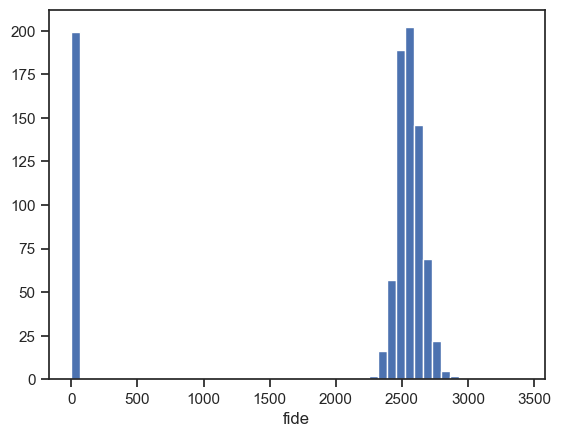

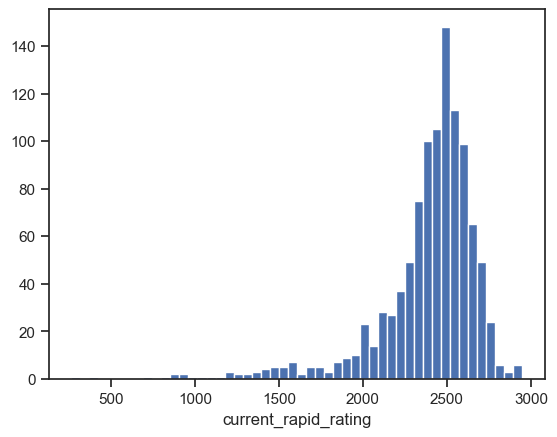

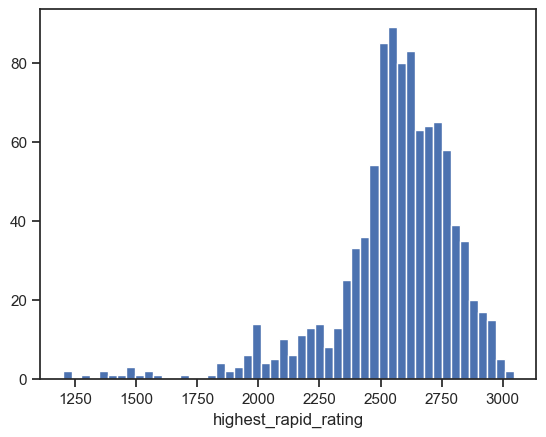

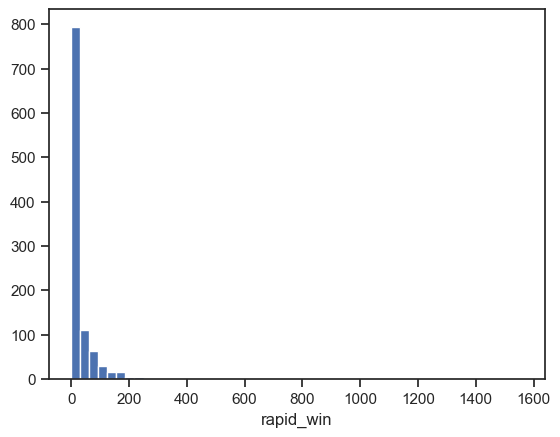

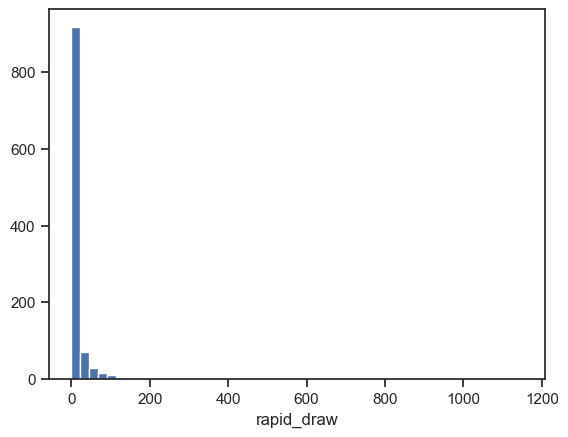

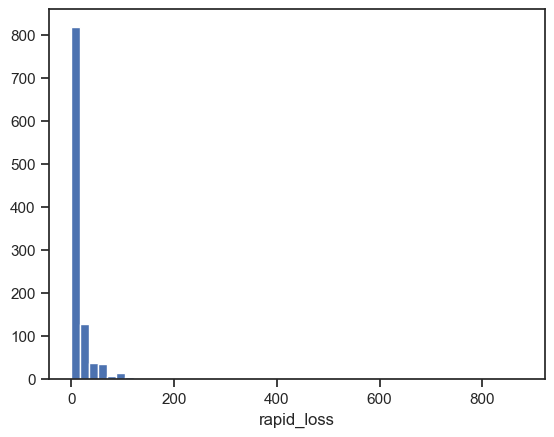

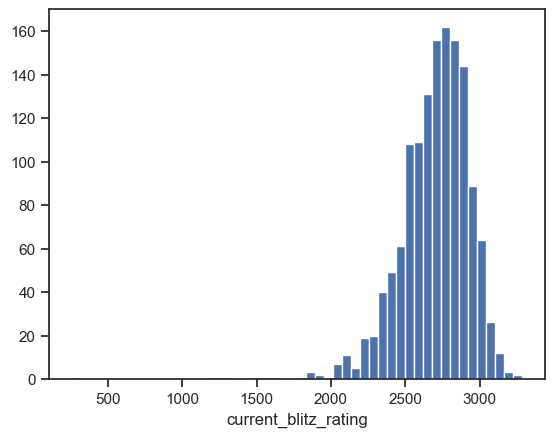

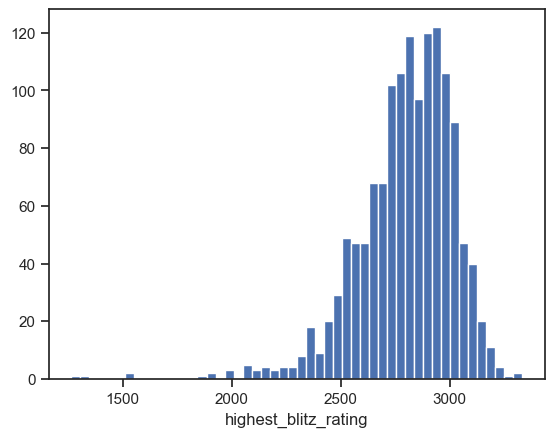

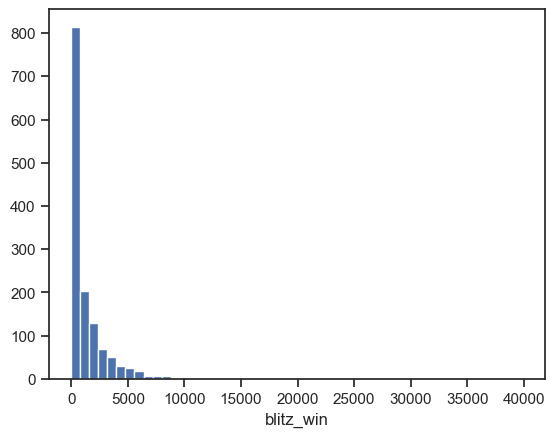

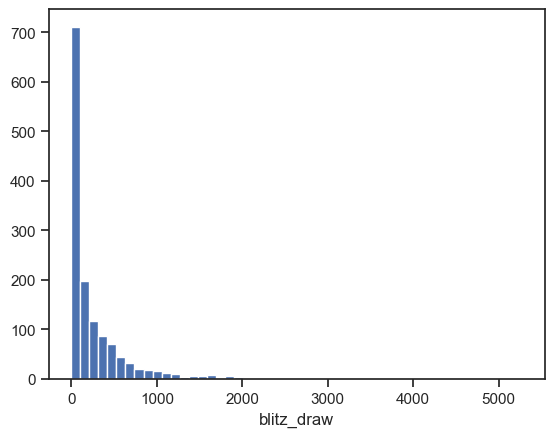

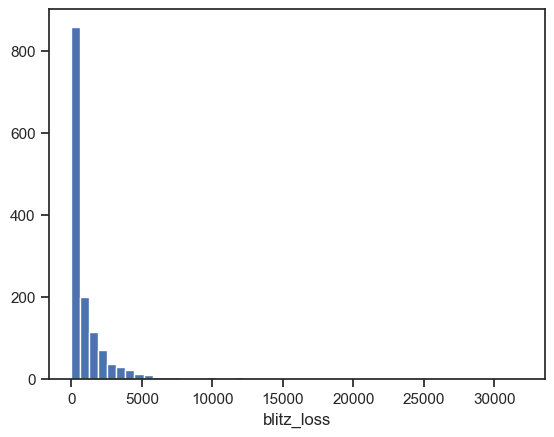

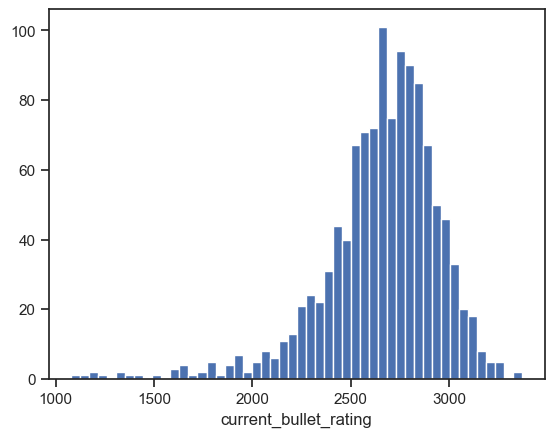

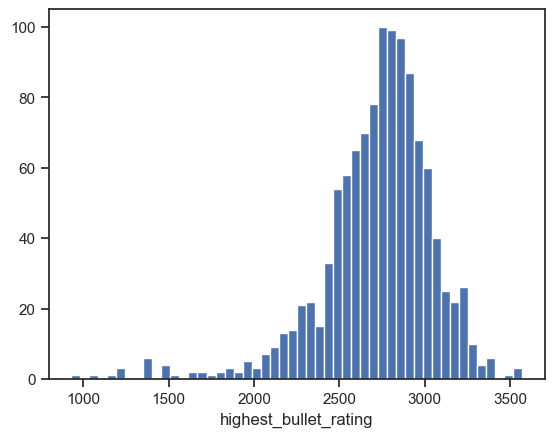

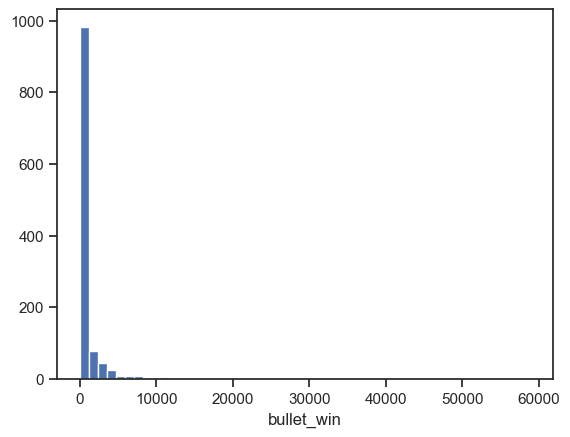

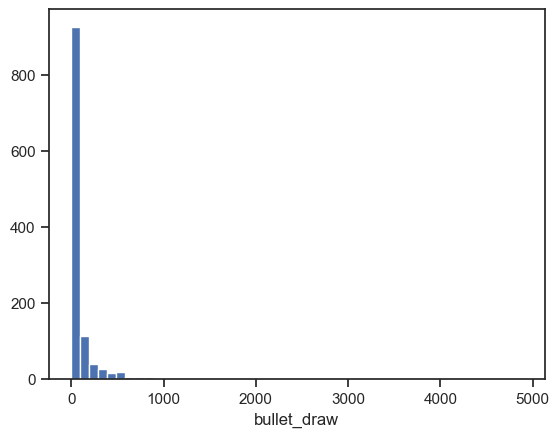

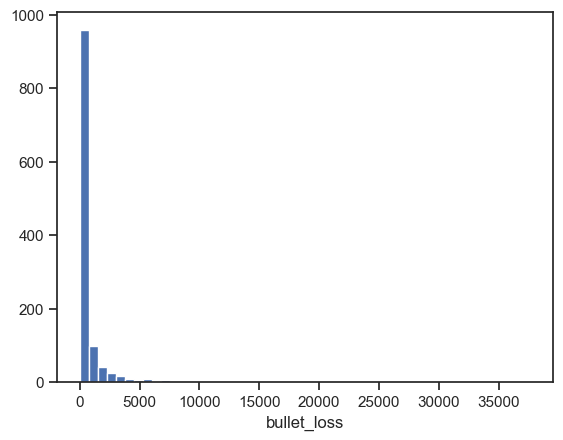

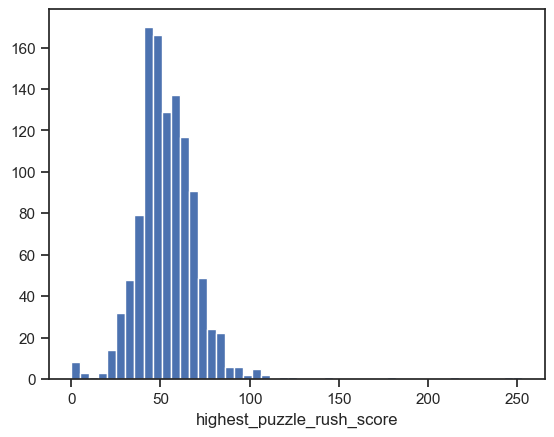

In [13]:
# Гистограмма по признакам
for col in data_num:
    plt.hist(df[col], 50)
    plt.xlabel(col)
    plt.show()

In [14]:
data_num_fide = data_num[['fide']]
data_num_fide.head()

,fide
0,3411.0
1,2950.0
2,2882.0
3,2882.0
4,2835.0


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

In [16]:
# Фильтр для проверки заполнения пустых значений
indicator = MissingIndicator()
mask_missing_values_only = indicator.fit_transform(data_num_fide)
mask_missing_values_only

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [17]:
strategies=['mean', 'median', 'most_frequent']

In [18]:
def test_num_impute(strategy_param):
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(data_num_fide)
    return data_num_imp[mask_missing_values_only]

In [19]:
strategies[0], test_num_impute(strategies[0])

('mean',
 array([2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2002.93756846, 2002.93756846,
        2002.93756846, 2002.93756846, 2

In [20]:
strategies[1], test_num_impute(strategies[1])

('median',
 array([2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523.,
        2523., 2523., 2523., 2523., 2523., 2523., 2523., 2523., 25

In [21]:
strategies[2], test_num_impute(strategies[2])


('most_frequent',
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [22]:
# Более сложная функция, которая позволяет задавать колонку и вид импьютации
def test_num_impute_col(dataset, column, strategy_param):
    temp_data = dataset[[column]]
    
    indicator = MissingIndicator()
    mask_missing_values_only = indicator.fit_transform(temp_data)
    
    imp_num = SimpleImputer(strategy=strategy_param)
    data_num_imp = imp_num.fit_transform(temp_data)
    
    filled_data = data_num_imp[mask_missing_values_only]
    
    return column, strategy_param, filled_data.size, filled_data[0], filled_data[filled_data.size-1]

In [23]:
df[['fide']].describe()

,fide
count,913.000000
mean,2002.937568
std,1061.740709
min,0.000000
25%,2405.000000
50%,2523.000000
75%,2600.000000
max,3411.000000


In [24]:
test_num_impute_col(df, 'fide', strategies[0])

('fide', 'mean', 595, 2002.9375684556408, 2002.9375684556408)

In [25]:
test_num_impute_col(df, 'fide', strategies[1])

('fide', 'median', 595, 2523.0, 2523.0)

In [26]:
test_num_impute_col(df, 'fide', strategies[2])

('fide', 'most_frequent', 595, 0.0, 0.0)

In [27]:
# Выберем категориальные колонки с пропущенными значениями
# Цикл по колонкам датасета
cat_cols = []
for col in df.columns:
    # Количество пустых значений 
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        temp_perc = round((temp_null_count / total_count) * 100.0, 2)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}, {}%.'.format(col, dt, temp_null_count, temp_perc))

Колонка name. Тип данных object. Количество пустых значений 267, 17.71%.
Колонка highest_rapid_date. Тип данных object. Количество пустых значений 511, 33.89%.
Колонка highest_blitz_date. Тип данных object. Количество пустых значений 126, 8.36%.
Колонка highest_bullet_date. Тип данных object. Количество пустых значений 364, 24.14%.
Колонка league. Тип данных object. Количество пустых значений 380, 25.2%.


In [28]:
cat_temp_data = df[['league']]
cat_temp_data.head()

,league
0,NaN
1,Bronze
2,NaN
3,Elite
4,Crystal


In [29]:
cat_temp_data['league'].unique()

array([nan, 'Bronze', 'Elite', 'Crystal', 'Silver', 'Legend', 'Wood',
       'Champion', 'Stone'], dtype=object)

In [30]:
cat_temp_data[cat_temp_data['league'].isnull()].shape


(380, 1)

In [31]:
# Импьютация наиболее частыми значениями
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data_imp2 = imp2.fit_transform(cat_temp_data)
data_imp2

array([['Silver'],
       ['Bronze'],
       ['Silver'],
       ...,
       ['Silver'],
       ['Silver'],
       ['Crystal']], dtype=object)

In [32]:
# Пустые значения отсутствуют
np.unique(data_imp2)

array(['Bronze', 'Champion', 'Crystal', 'Elite', 'Legend', 'Silver',
       'Stone', 'Wood'], dtype=object)

In [33]:
# Импьютация константой для имени
name_data = df[['name']]
imp3 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_imp3 = imp3.fit_transform(name_data)
data_imp3

array([['Komodo Engine'],
       ['Vojtěch Plát'],
       ['PlayMagnus Carlsen'],
       ...,
       ['Alexander Zubov'],
       ['Alexander Zubov'],
       ['Andre Diamant']], dtype=object)

In [34]:
data_imp3[data_imp3=='NA'].size

267

# Преобразование категориальных признаков в числовые

In [35]:
cat_enc = pd.DataFrame({'c1':data_imp2.T[0]})
cat_enc

,c1
0,Silver
1,Bronze
2,Silver
3,Elite
4,Crystal
...,...
1503,Silver
1504,Champion
1505,Silver
1506,Silver


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
cat_enc['c1'].unique()

array(['Silver', 'Bronze', 'Elite', 'Crystal', 'Legend', 'Wood',
       'Champion', 'Stone'], dtype=object)

In [38]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [39]:
# Наименования категорий в соответствии с порядковыми номерами

# Свойство называется classes, потому что предполагается что мы решаем 
# задачу классификации и каждое значение категории соответствует 
# какому-либо классу целевого признака

le.classes_

array(['Bronze', 'Champion', 'Crystal', 'Elite', 'Legend', 'Silver',
       'Stone', 'Wood'], dtype=object)

In [40]:
cat_enc_le

array([5, 0, 5, ..., 5, 5, 2])

In [41]:
np.unique(cat_enc_le)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [42]:
le.inverse_transform([0, 1, 2, 3])

array(['Bronze', 'Champion', 'Crystal', 'Elite'], dtype=object)

## OriginalEncoder

In [43]:
from sklearn.preprocessing import OrdinalEncoder

In [44]:
data_oe = df[['name', 'country', 'league']]
data_oe.head()

,name,country,league
0,Komodo Engine,United States,NaN
1,Vojtěch Plát,Czech Republic,Bronze
2,PlayMagnus Carlsen,Norway,NaN
3,Magnus Carlsen,Norway,Elite
4,Fabiano Caruana,United States,Crystal


In [45]:
imp4 = SimpleImputer(missing_values=np.nan, strategy='constant', fill_value='NA')
data_oe_filled = imp4.fit_transform(data_oe)
data_oe_filled


array([['Komodo Engine', 'United States', 'NA'],
       ['Vojtěch Plát', 'Czech Republic', 'Bronze'],
       ['PlayMagnus Carlsen', 'Norway', 'NA'],
       ...,
       ['Alexander Zubov', 'Ukraine', 'NA'],
       ['Alexander Zubov', 'Ukraine', 'NA'],
       ['Andre Diamant', 'Brazil', 'Crystal']], dtype=object)

In [46]:
oe = OrdinalEncoder()
cat_enc_oe = oe.fit_transform(data_oe_filled)
cat_enc_oe

array([[ 552.,  117.,    5.],
       [1051.,   27.,    0.],
       [ 808.,   75.,    5.],
       ...,
       [  62.,  114.,    5.],
       [  62.,  114.,    5.],
       [  84.,   14.,    2.]])

In [47]:
# Уникальные значения 1 признака
np.unique(cat_enc_oe[:, 0])

array([0.000e+00, 1.000e+00, 2.000e+00, ..., 1.141e+03, 1.142e+03,
       1.143e+03])

In [48]:
# Уникальные значения 2 признака
np.unique(cat_enc_oe[:, 1])

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.,
        11.,  12.,  13.,  14.,  15.,  16.,  17.,  18.,  19.,  20.,  21.,
        22.,  23.,  24.,  25.,  26.,  27.,  28.,  29.,  30.,  31.,  32.,
        33.,  34.,  35.,  36.,  37.,  38.,  39.,  40.,  41.,  42.,  43.,
        44.,  45.,  46.,  47.,  48.,  49.,  50.,  51.,  52.,  53.,  54.,
        55.,  56.,  57.,  58.,  59.,  60.,  61.,  62.,  63.,  64.,  65.,
        66.,  67.,  68.,  69.,  70.,  71.,  72.,  73.,  74.,  75.,  76.,
        77.,  78.,  79.,  80.,  81.,  82.,  83.,  84.,  85.,  86.,  87.,
        88.,  89.,  90.,  91.,  92.,  93.,  94.,  95.,  96.,  97.,  98.,
        99., 100., 101., 102., 103., 104., 105., 106., 107., 108., 109.,
       110., 111., 112., 113., 114., 115., 116., 117., 118., 119., 120.,
       121., 122.])

In [49]:
# Уникальные значения 3 признака
np.unique(cat_enc_oe[:, 2])

array([0., 1., 2., 3., 4., 5., 6., 7., 8.])

In [50]:
# Наименования категорий в соответствии с порядковыми номерами
oe.categories_

[array(['A.A AL', 'Abdelrahman Hesham', 'Abdulla Gadimbayli', ...,
        'Спартак Высочин', 'אהרן בגראטיוני', '蔡依林'], dtype=object),
 array(['Algeria', 'American Samoa', 'Andorra', 'Argentina', 'Armenia',
        'Aruba', 'Australia', 'Austria', 'Azerbaijan', 'Bangladesh',
        'Belarus', 'Belgium', 'Bolivia', 'Bosnia-Herzegovina', 'Brazil',
        'British Virgin Islands', 'Brunei', 'Bulgaria', 'Canada',
        'Canary Islands', 'Cayman Islands', 'Central Africa', 'Chile',
        'China', 'Colombia', 'Croatia', 'Cuba', 'Czech Republic',
        'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'England',
        'Estonia', 'Fiji', 'Finland', 'France', 'Georgia', 'Germany',
        'Ghana', 'Greece', 'Greenland', 'Guatemala', 'Haiti', 'Hong Kong',
        'Hungary', 'Iceland', 'India', 'Indonesia', 'International',
        'Iran', 'Ireland', 'Isle of Man', 'Israel', 'Italy', 'Ivory Coast',
        'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Latvia',
        'Liechtenstein',

In [51]:
# Обратное преобразование
oe.inverse_transform(cat_enc_oe)

array([['Komodo Engine', 'United States', 'NA'],
       ['Vojtěch Plát', 'Czech Republic', 'Bronze'],
       ['PlayMagnus Carlsen', 'Norway', 'NA'],
       ...,
       ['Alexander Zubov', 'Ukraine', 'NA'],
       ['Alexander Zubov', 'Ukraine', 'NA'],
       ['Andre Diamant', 'Brazil', 'Crystal']], dtype=object)

# Кодирование шкал порядка

In [52]:
# пример шкалы порядка 'small' < 'medium' < 'large'
sizes = ['small', 'medium', 'large', 'small', 'medium', 'large', 'small', 'medium', 'large']

In [53]:
pd_sizes = pd.DataFrame(data={'sizes':sizes})
pd_sizes

,sizes
0,small
1,medium
2,large
3,small
4,medium
5,large
6,small
7,medium
8,large


In [54]:
pd_sizes['sizes_codes'] = pd_sizes['sizes'].map({'small':1, 'medium':2, 'large':3})
pd_sizes

,sizes,sizes_codes
0,small,1
1,medium,2
2,large,3
3,small,1
4,medium,2
5,large,3
6,small,1
7,medium,2
8,large,3


In [55]:
pd_sizes['sizes_decoded'] = pd_sizes['sizes_codes'].map({1:'small', 2:'medium', 3:'large'})
pd_sizes

,sizes,sizes_codes,sizes_decoded
0,small,1,small
1,medium,2,medium
2,large,3,large
3,small,1,small
4,medium,2,medium
5,large,3,large
6,small,1,small
7,medium,2,medium
8,large,3,large


# Кодирование категорий наборами бинарных значений

In [56]:
from sklearn.preprocessing import OneHotEncoder

In [57]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [58]:
cat_enc.shape

(1508, 1)

In [59]:
cat_enc_ohe.shape

(1508, 8)

In [60]:
cat_enc_ohe

<1508x8 sparse matrix of type '<class 'numpy.float64'>'
	with 1508 stored elements in Compressed Sparse Row format>

In [61]:
cat_enc_ohe.todense()[0:10]

matrix([[0., 0., 0., 0., 0., 1., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0.]])

In [62]:
cat_enc.head(10)

,c1
0,Silver
1,Bronze
2,Silver
3,Elite
4,Crystal
5,Silver
6,Legend
7,Silver
8,Silver
9,Silver


### Быстрый вариант one-hot кодирования

In [63]:
pd.get_dummies(cat_enc).head()

,c1_Bronze,c1_Champion,c1_Crystal,c1_Elite,c1_Legend,c1_Silver,c1_Stone,c1_Wood
0,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False
2,False,False,False,False,False,True,False,False
3,False,False,False,True,False,False,False,False
4,False,False,True,False,False,False,False,False


In [64]:
pd.get_dummies(cat_temp_data, dummy_na=True).head()

,league_Bronze,league_Champion,league_Crystal,league_Elite,league_Legend,league_Silver,league_Stone,league_Wood,league_nan
0,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,True
3,False,False,False,True,False,False,False,False,False
4,False,False,True,False,False,False,False,False,False


# Масштабирование данных

In [65]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

In [66]:
sc1 = MinMaxScaler()
sc1_data = sc1.fit_transform(df[['highest_rapid_rating']])

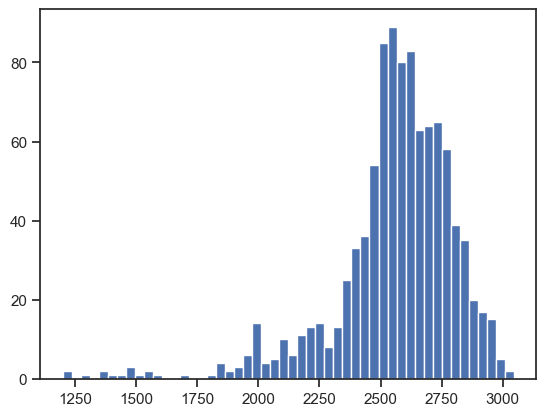

In [67]:
plt.hist(df['highest_rapid_rating'], 50)
plt.show()

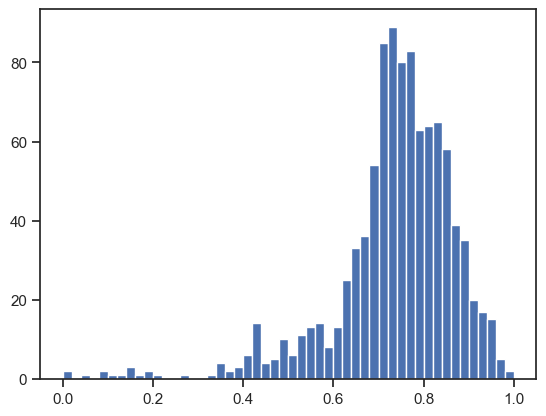

In [68]:
plt.hist(sc1_data, 50)
plt.show()

In [69]:
sc2 = StandardScaler()
sc2_data = sc2.fit_transform(df[['highest_rapid_rating']])

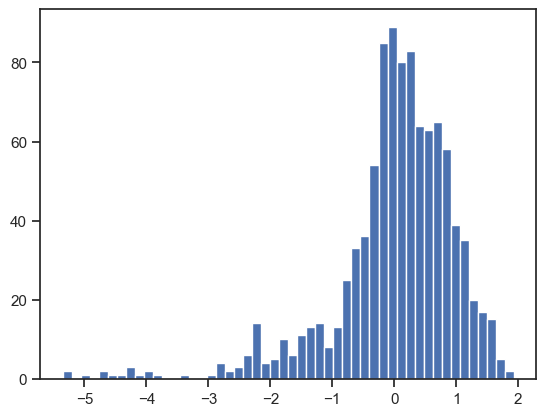

In [70]:
plt.hist(sc2_data, 50)
plt.show()